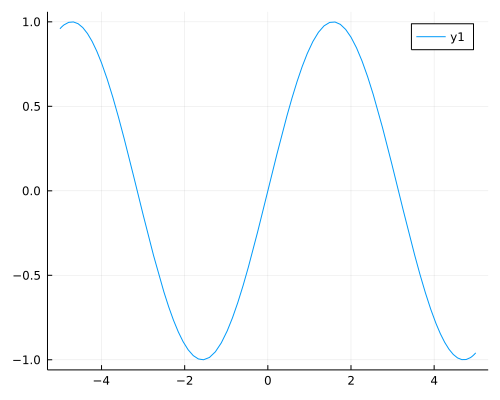

In [14]:
using Distributions
using StatsPlots
using Memoization

default(size=(500, 400))
plot(sin)

In [2]:
@memoize function E_bin(f, n, p)
    bin = Binomial(n, p)
    sum(f(k) * pdf(bin, k) for k in support(bin))
end

@memoize function E_negbin(g, k, p)
    negbin = LocationScale(k, 1, NegativeBinomial(k, p))
    m, s = mean(negbin), std(negbin)
    nmax = round(Int, m + 5s)
    sum(g(n) * pdf(negbin, n) for n in k:nmax)
end

function squared_error(n, k, p; a = 0.5, b = 0.5)
    p̂ = (k + a)/(n + a + b)
    (p̂ - p)^2
end

function kl(n, k, p; a = 0.5, b = 0.5)
    p̂ = (k + a)/(n + a + b)
    @assert 0 < p̂ < 1 "p̂ = $p̂, n = $n, k = $k, a = $a, b = $b"
    - entropy(Bernoulli(p)) - p*log(p̂) - (1 - p)*log(1 - p̂)
end

kl (generic function with 1 method)

  2.103047 seconds (4.72 M allocations: 188.780 MiB, 9.30% compilation time)
(val, idx) = findmin(z) = (0.04789834758791819, CartesianIndex(51, 51))
(a[idx[1]], b[idx[2]]) = (0.51, 0.51)


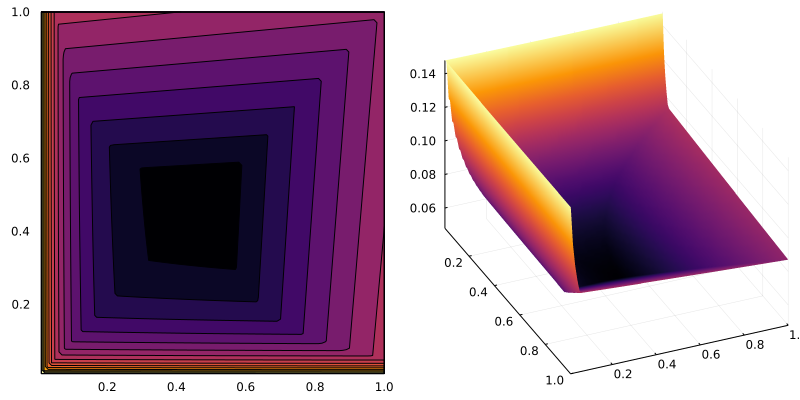

In [21]:
n = 10
@memoize f(n, a, b) =  maximum(p -> E_bin(k -> kl(n, k, p; a, b), n, p), 0.0:0.01:1)
a = b = 0.01:0.01:1
@time z = f.(n, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

  7.964050 seconds (4.65 M allocations: 186.153 MiB, 12.34% gc time, 2.55% compilation time)
(val, idx) = findmin(z) = (0.09221460199524759, CartesianIndex(41, 44))
(a[idx[1]], b[idx[2]]) = (0.41, 0.44)


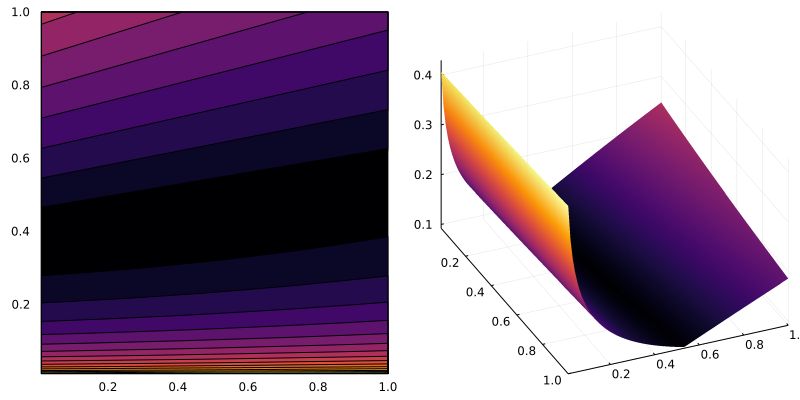

In [22]:
k = 3
@memoize g(k, a, b) =  maximum(p -> E_negbin(n -> kl(n, k, p; a, b), k, p), 0.01:0.01:0.99)
a = b = 0.01:0.01:1
@time z = g.(k, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

  8.084619 seconds (9.95 M allocations: 388.728 MiB, 31.42% gc time, 2.45% compilation time)
(val, idx) = findmin(z) = (0.014435380308755486, CartesianIndex(109, 109))
(a[idx[1]], b[idx[2]]) = (1.58, 1.58)


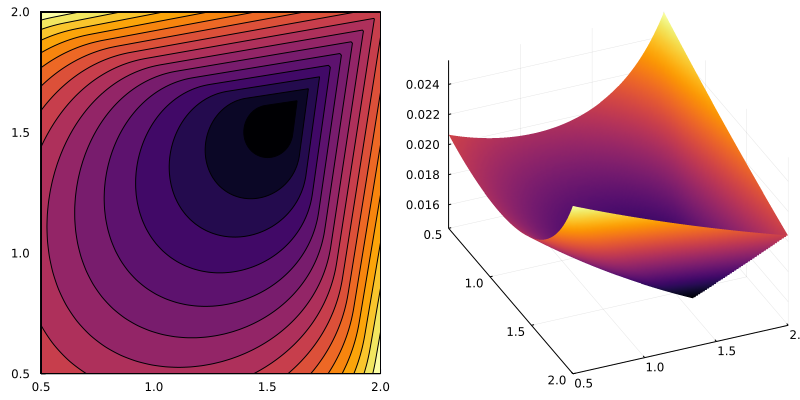

In [33]:
n = 10
@memoize F(n, a, b) =  maximum(p -> E_bin(k -> squared_error(n, k, p; a, b), n, p), 0:0.01:1)
a = b = 0.5:0.01:2
@time z = F.(n, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

  5.615400 seconds (4.65 M allocations: 186.265 MiB, 3.47% compilation time)
(val, idx) = findmin(z) = (0.029032601728148276, CartesianIndex(16, 66))
(a[idx[1]], b[idx[2]]) = (0.16, 0.66)


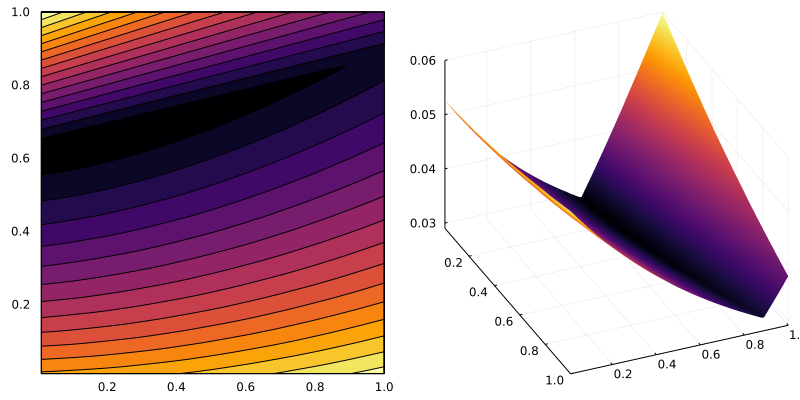

In [35]:
k = 3
@memoize G(k, a, b) =  maximum(p -> E_negbin(n -> squared_error(n, k, p; a, b), k, p), 0.01:0.01:0.99)
a = b = 0.01:0.01:1
@time z = G.(k, a, b')
@show val, idx = findmin(z)
@show a[idx[1]], b[idx[2]]
P = contourf(a, b, z'; label="")
Q = surface(a, b, z'; label="")
plot(P, Q; size=(800, 400), colorbar=false, camera=(60, 60))

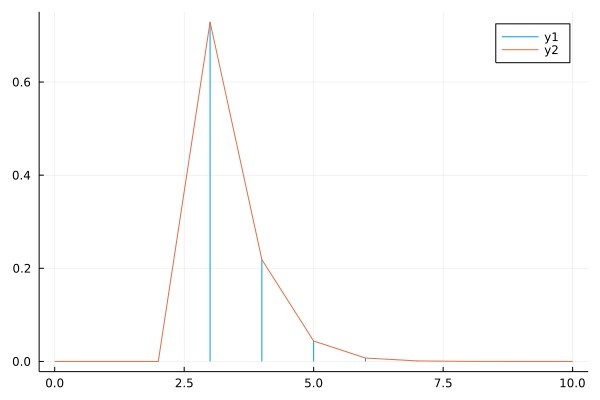

In [7]:
k = 3
p = 0.9
negbin = LocationScale(k, 1, NegativeBinomial(k, p))
plot(negbin)
plot!(n -> n ≥ k ? binomial(n-1, k-1)*p^k*(1-p)^(n-k) : 0.0, 0:10)

In [8]:
@doc NegativeBinomial

```
NegativeBinomial(r,p)
```

A *Negative binomial distribution* describes the number of failures before the `r`th success in a sequence of independent Bernoulli trials. It is parameterized by `r`, the number of successes, and `p`, the probability of success in an individual trial.

$$
P(X = k) = {k + r - 1 \choose k} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

The distribution remains well-defined for any positive `r`, in which case

$$
P(X = k) = \frac{\Gamma(k+r)}{k! \Gamma(r)} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

```julia
NegativeBinomial()        # Negative binomial distribution with r = 1 and p = 0.5
NegativeBinomial(r, p)    # Negative binomial distribution with r successes and success rate p

params(d)       # Get the parameters, i.e. (r, p)
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Negative binomial distribution on Wolfram](https://reference.wolfram.com/language/ref/NegativeBinomialDistribution.html)

Note: The definition of the negative binomial distribution in Wolfram is different from the [Wikipedia definition](http://en.wikipedia.org/wiki/Negative_binomial_distribution). In Wikipedia, `r` is the number of failures and `k` is the number of successes.
